In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
tests = 7
N = 40000

# Columnwise 

In [3]:
columnwise = pd.read_csv('./columnwise.csv', index_col=0)
columnwise.head()

,$index_{max}$,$max$,index_{min},min,avg
0,1.0,5.645,1.0,5.645,5.645
1,1.0,5.645,2.0,5.216,5.431
2,1.0,5.645,3.0,3.842,4.901
3,1.0,5.645,4.0,3.620,4.581
4,1.0,5.645,4.0,3.620,4.405


In [4]:
end_columnwise = columnwise.iloc[columnwise.index[(columnwise.index % tests == 0)] - 1].sort_index()
end_columnwise.index = pd.np.arange(len(end_columnwise)) + 1

In [41]:
end_columnwise['total_avg'] = end_columnwise['avg'].mean()

In [42]:
end_columnwise.head()

,$index_{max}$,$max$,index_{min},min,avg,total_avg
1,1.0,5.645,4.0,3.620,4.272,4.2098
2,2.0,5.195,7.0,3.540,4.144,4.2098
3,2.0,5.006,4.0,3.653,4.179,4.2098
4,2.0,5.739,5.0,3.560,4.271,4.2098
5,1.0,5.150,4.0,3.628,4.183,4.2098


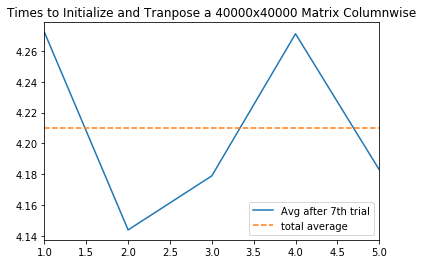

In [45]:
ax = end_columnwise['avg'].plot(legend=True, title='Times to Initialize and Tranpose a 40000x40000 Matrix Columnwise')
ax = end_columnwise['total_avg'].plot(legend=True, style=['--'])
plt.legend(['Avg after 7th trial', 'total average'])

In [7]:
end_columnwise['avg'].mean()

4.2097999999999995

# Rowwise 

In [8]:
rowwise = pd.read_csv('./rowwise.csv', index_col=0)
rowwise.head()

,$index_{max}$,$max$,index_{min},min,avg
0,1.0,4.744,1.0,4.744,4.744
1,1.0,4.744,2.0,4.657,4.700
2,1.0,4.744,3.0,3.837,4.413
3,1.0,4.744,4.0,3.476,4.178
4,1.0,4.744,4.0,3.476,4.058


In [9]:
end_rowwise = rowwise.iloc[rowwise.index[(rowwise.index % tests == 0)] - 1].sort_index()
end_rowwise.index = pd.np.arange(len(end_rowwise)) + 1

In [19]:
end_rowwise['total_avg'] = end_rowwise['avg'].mean()

In [20]:
end_rowwise.head()

,$index_{max}$,$max$,index_{min},min,avg,total_avg
1,1.0,4.744,4.0,3.476,3.985,4.0204
2,1.0,5.228,5.0,3.487,4.012,4.0204
3,1.0,4.854,4.0,3.485,3.876,4.0204
4,1.0,5.407,5.0,3.617,4.284,4.0204
5,1.0,4.901,6.0,3.497,3.945,4.0204


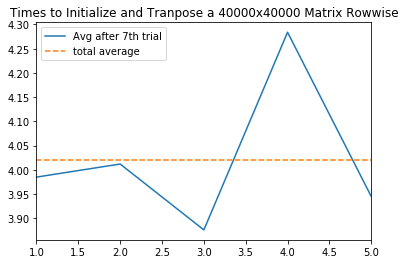

In [46]:
ax = end_rowwise['avg'].plot(legend=True, title='Times to Initialize and Tranpose a 40000x40000 Matrix Rowwise')
ax = end_rowwise['total_avg'].plot(legend=True, style=['--'])
plt.legend(['Avg after 7th trial', 'total average'])

In [18]:
end_rowwise['avg'].mean()

4.0204

# Comparisons

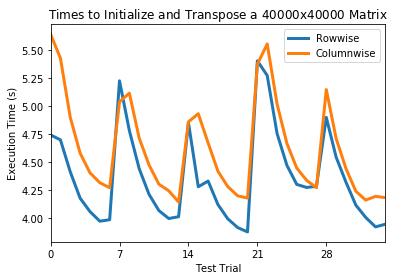

In [66]:
title = 'Times to Initialize and Transpose a ${N}$x${N}$ Matrix'
rowwise['avg'].plot(title=title.format(N=N), legend=True, lw=3)
ax = columnwise['avg'].plot(legend=True, lw=3)
ax.legend(['Rowwise', 'Columnwise'])
ax.set_xlabel('Test Trial')
ax.set_ylabel('Execution Time (s)')
_ = ax.set_xticks(7 * (pd.np.arange(len(end_rowwise))))

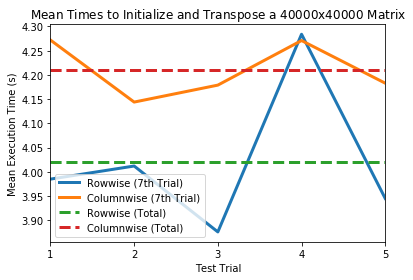

In [77]:
title = 'Mean Times to Initialize and Transpose a ${N}$x${N}$ Matrix'
end_rowwise['avg'].plot(title=title.format(N=N), legend=True, lw=3)
ax = end_columnwise['avg'].plot(legend=True, lw=3)

ax.set_xlabel('Test Trial')
ax.set_ylabel('Mean Execution Time (s)')

ax = end_rowwise['total_avg'].plot(legend=True, style=['--'], lw=3)
ax = end_columnwise['total_avg'].plot(legend=True, style=['--'], lw=3)
ax.legend(['Rowwise (7th Trial)', 'Columnwise (7th Trial)', 'Rowwise (Total)', 'Columnwise (Total)'])

_ = ax.set_xticks(pd.np.arange(len(end_rowwise)) + 1)